<a href="https://colab.research.google.com/github/AI-Junction/Nuclei-Detection/blob/master/Cell_Nuclei_Detection-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
!pip install kaggle

In [3]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

#filename = "/content/.kaggle/kaggle.json"
#filename = "/.kaggle/kaggle.json"
filename = "kaggle.json"
#os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [4]:
!ls -lha kaggle.json

---x-wx--T 1 root root 65 Dec  4 10:06 kaggle.json


In [5]:
os.path.isdir("/root/.kaggle")

True

In [6]:
dir_kaggle = "/root/.kaggle"
if not os.path.isdir(dir_kaggle):
  !mkdir -p ~/.kaggle  
!cp kaggle.json ~/.kaggle/
os.path.isdir(dir_kaggle)

True

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!kaggle competitions files -c data-science-bowl-2018

name                                     size  creationDate         
--------------------------------------  -----  -------------------  
stage1_sample_submission.csv.zip          3KB  2018-01-16 03:46:07  
stage1_train_labels.csv.zip               3MB  2018-01-16 03:46:08  
stage1_test.zip                           9MB  2018-01-16 03:46:09  
stage1_train.zip                         79MB  2018-01-16 03:46:15  
stage2_sample_submission_final.csv.zip  112KB  2018-04-12 00:03:52  
stage2_test_final.zip                   276MB  2018-04-12 00:03:54  
stage1_solution.csv.zip                 382KB  2018-04-12 00:03:57  


In [0]:
if not os.path.isdir("drive/My Drive/All ML Datasets/Data-science-bowl-2018"):
  ! mkdir -p "drive/My Drive/All ML Datasets/Data-science-bowl-2018"

In [0]:
if not os.path.isfile("drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_sample_submission.csv.zip"):
  !kaggle competitions download -c data-science-bowl-2018 -f stage1_sample_submission.csv.zip -p "/content/drive/My Drive/All ML Datasets/Data-science-bowl-2018"
  !kaggle competitions download -c data-science-bowl-2018 -f stage1_train_labels.csv.zip -p "/content/drive/My Drive/All ML Datasets/Data-science-bowl-2018"
  !kaggle competitions download -c data-science-bowl-2018 -f stage1_test.zip -p "/content/drive/My Drive/All ML Datasets/Data-science-bowl-2018"
  !kaggle competitions download -c data-science-bowl-2018 -f stage1_train.zip -p "/content/drive/My Drive/All ML Datasets/Data-science-bowl-2018"
  !kaggle competitions download -c data-science-bowl-2018 -f stage2_sample_submission_final.csv.zip -p "/content/drive/My Drive/All ML Datasets/Data-science-bowl-2018"
  #!kaggle competitions download -c data-science-bowl-2018 -f stage2_test_final.zip -p "/content/drive/My Drive/All ML Datasets/Data-science-bowl-2018"
  !kaggle competitions download -c data-science-bowl-2018 -f stage1_solution.csv.zip -p "/content/drive/My Drive/All ML Datasets/Data-science-bowl-2018"

In [12]:
'''
stage1_sample_submission.csv.zip          3KB  2018-01-16 03:46:07  
stage1_train_labels.csv.zip               3MB  2018-01-16 03:46:08  
stage1_test.zip                           9MB  2018-01-16 03:46:09  
stage1_train.zip                         79MB  2018-01-16 03:46:15  
stage2_sample_submission_final.csv.zip  112KB  2018-04-12 00:03:52  
stage2_test_final.zip                   276MB  2018-04-12 00:03:54  
stage1_solution.csv.zip                 382KB  2018-04-12 00:03:57  
'''

'\nstage1_sample_submission.csv.zip          3KB  2018-01-16 03:46:07  \nstage1_train_labels.csv.zip               3MB  2018-01-16 03:46:08  \nstage1_test.zip                           9MB  2018-01-16 03:46:09  \nstage1_train.zip                         79MB  2018-01-16 03:46:15  \nstage2_sample_submission_final.csv.zip  112KB  2018-04-12 00:03:52  \nstage2_test_final.zip                   276MB  2018-04-12 00:03:54  \nstage1_solution.csv.zip                 382KB  2018-04-12 00:03:57  \n'

In [0]:
if not os.path.isfile("drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_sample_submission.csv"):
  !unzip "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_sample_submission.csv.zip" -d "drive/My Drive/All ML Datasets/Data-science-bowl-2018"


In [0]:
if not os.path.isfile("drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_train_labels.csv"):
  !unzip "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_train_labels.csv.zip" -d "drive/My Drive/All ML Datasets/Data-science-bowl-2018"

In [0]:
if not os.path.isdir("drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_test"):
  !mkdir -p "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_test"
  !unzip "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_test.zip" -d "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_test"

In [0]:
if not os.path.isdir("drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_train"):
  !mkdir -p "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_train"
  !unzip "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_train.zip" -d "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_train"


In [0]:
if not os.path.isfile("drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_sample_submission_final.csv"):
  !unzip "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_sample_submission_final.csv.zip" -d "drive/My Drive/All ML Datasets/Data-science-bowl-2018"


In [18]:
# not downloading stage2_test_final.zip at this stage due to large size  
'''
if not os.path.isdir("drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_test_final"):
  !mkdir -p "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_test_final"
  !unzip "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_test_final.zip" -d "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_test_final"
'''


'\nif not os.path.isdir("drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_test_final"):\n  !mkdir -p "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_test_final"\n  !unzip "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_test_final.zip" -d "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage2_test_final"\n'

In [0]:
if not os.path.isfile("drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_solution.csv"):
  !unzip "drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_solution.csv.zip" -d "drive/My Drive/All ML Datasets/Data-science-bowl-2018"


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import theano
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


dsb_data_dir = "drive/My Drive/All ML Datasets/Data-science-bowl-2018"

##dsb_data_dir = os.path.join('..', 'input')
stage_label = 'stage1'

In [21]:
train_labels = pd.read_csv(os.path.join(dsb_data_dir,'{}_train_labels.csv'.format(stage_label)))
train_labels['EncodedPixels'] = train_labels['EncodedPixels'].map(lambda ep: [int(x) for x in ep.split(' ')])
train_labels.sample(3)

,ImageId,EncodedPixels
23045,c304a1fdf3bca2f4b4580d2cac59942e2224a7678001bf...,"[213483, 11, 214002, 13, 214521, 15, 215040, 1..."
7502,3ebd2ab34ba86e515feb79ffdeb7fc303a074a98ba3994...,"[344537, 4, 345055, 9, 345574, 12, 346093, 14,..."
10489,54cb3328e778d87f76062b0550e3bc190f46384acd8efb...,"[22908, 3, 23163, 5, 23419, 5, 23675, 5, 23932..."


In [22]:
os.path.join(dsb_data_dir, 'stage1_*', '*', '*', '*')

'drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_*/*/*/*'

In [0]:
all_images = glob(os.path.join(dsb_data_dir, 'stage1_*', '*', '*', '*'))

In [24]:
print(all_images[:10])

['drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_test/43a71aeb641faa18742cb826772a8566c6c947d7050f9ab15459de6cc2b3b6af/images/43a71aeb641faa18742cb826772a8566c6c947d7050f9ab15459de6cc2b3b6af.png', 'drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_test/a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f/images/a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f.png', 'drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_test/1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e5c1c4cc586bc69f81a/images/1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e5c1c4cc586bc69f81a.png', 'drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_test/4f949bd8d914bbfa06f40d6a0e2b5b75c38bf53dbcbafc48c97f105bee4f8fac/images/4f949bd8d914bbfa06f40d6a0e2b5b75c38bf53dbcbafc48c97f105bee4f8fac.png', 'drive/My Drive/All ML Datasets/Data-science-bowl-2018/stage1_test/1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c/images/1747f62148a919c8feb6

In [25]:
#all_images = glob(os.path.join(dsb_data_dir, 'stage1_*', '*', '*', '*'))
img_df = pd.DataFrame({'path': all_images})
img_id = lambda in_path: in_path.split('/')[-3]
img_type = lambda in_path: in_path.split('/')[-2]
img_group = lambda in_path: in_path.split('/')[-4].split('_')[1]
img_stage = lambda in_path: in_path.split('/')[-4].split('_')[0]
img_df['ImageId'] = img_df['path'].map(img_id)
img_df['ImageType'] = img_df['path'].map(img_type)
img_df['TrainingSplit'] = img_df['path'].map(img_group)
img_df['Stage'] = img_df['path'].map(img_stage)
img_df.sample(2)

,path,ImageId,ImageType,TrainingSplit,Stage
11114,drive/My Drive/All ML Datasets/Data-science-bo...,58c593bcb98386e7fd42a1d34e291db93477624b164e83...,masks,train,stage1
10052,drive/My Drive/All ML Datasets/Data-science-bo...,52a6b8ae4c8e0a8a07a31b8e3f401d8811bf1942969c19...,masks,train,stage1


In [26]:
%%time
train_df = img_df.query('TrainingSplit=="train"')
train_rows = []
group_cols = ['Stage', 'ImageId']
for n_group, n_rows in train_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['masks'] = n_rows.query('ImageType == "masks"')['path'].values.tolist()
    c_row['images'] = n_rows.query('ImageType == "images"')['path'].values.tolist()
    train_rows += [c_row]

CPU times: user 1.26 s, sys: 4.08 ms, total: 1.26 s
Wall time: 1.26 s


In [28]:
train_img_df = pd.DataFrame(train_rows)    
IMG_CHANNELS = 3
def read_and_stack(in_img_list):
    return np.sum(np.stack([imread(c_img) for c_img in in_img_list], 0), 0)/255.0
train_img_df['images'] = train_img_df['images'].map(read_and_stack).map(lambda x: x[:,:,:IMG_CHANNELS])
train_img_df['masks'] = train_img_df['masks'].map(read_and_stack).map(lambda x: x.astype(int))
train_img_df.sample(1)

,ImageId,Stage,images,masks
32,0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee...,stage1,"[[[0.6588235294117647, 0.6, 0.8], [0.666666666...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


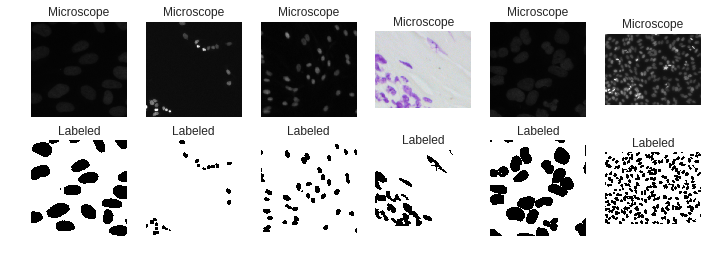

In [29]:
n_img = 6
fig, m_axs = plt.subplots(2, n_img, figsize = (12, 4))
for (_, c_row), (c_im, c_lab) in zip(train_img_df.sample(n_img).iterrows(), 
                                     m_axs.T):
    c_im.imshow(c_row['images'])
    c_im.axis('off')
    c_im.set_title('Microscope')
    
    c_lab.imshow(c_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('Labeled')

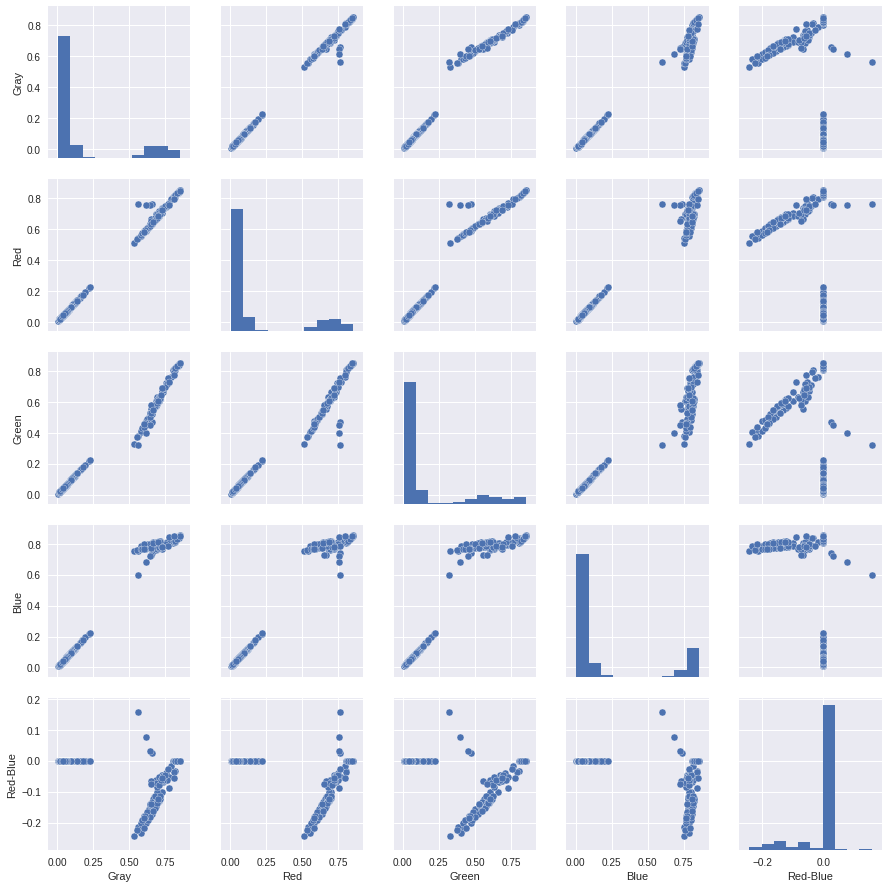

In [30]:
train_img_df['Red'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,0]))
train_img_df['Green'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,1]))
train_img_df['Blue'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,2]))
train_img_df['Gray'] = train_img_df['images'].map(lambda x: np.mean(x))
train_img_df['Red-Blue'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,0]-x[:,:,2]))
sns.pairplot(train_img_df[['Gray', 'Red', 'Green', 'Blue', 'Red-Blue']])

In [31]:
train_img_df['images'].map(lambda x: x.shape).value_counts()

(256, 256, 3)      206
(256, 320, 3)       81
(520, 696, 3)       63
(360, 360, 3)       58
(1024, 1024, 3)     15
(512, 640, 3)       10
(260, 347, 3)        4
(603, 1272, 3)       3
Name: images, dtype: int64

In [32]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, UpSampling2D, Lambda
simple_cnn = Sequential()
simple_cnn.add(BatchNormalization(input_shape = (None, None, IMG_CHANNELS), 
                                  name = 'NormalizeInput'))
simple_cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
simple_cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
# use dilations to get a slightly larger field of view
simple_cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
simple_cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
simple_cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 3, padding = 'same'))

# the final processing
simple_cnn.add(Conv2D(16, kernel_size = (1,1), padding = 'same'))
simple_cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))
simple_cnn.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 8)     224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 8)     584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 16)    528       
__________

In [0]:
from keras import backend as K
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
simple_cnn.compile(optimizer = 'adam', 
                   loss = dice_coef_loss, 
                   metrics = [dice_coef, 'acc', 'mse'])

In [34]:
def simple_gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

simple_cnn.fit_generator(simple_gen(), 
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 3)

Epoch 1/3
440/440 [==============================] - 340s 772ms/step - loss: -0.6849 - dice_coef: 0.6849 - acc: 0.8756 - mean_squared_error: 0.1184
Epoch 2/3
440/440 [==============================] - 334s 759ms/step - loss: -0.7769 - dice_coef: 0.7769 - acc: 0.9202 - mean_squared_error: 0.0764
Epoch 3/3
440/440 [==============================] - 334s 760ms/step - loss: -0.7860 - dice_coef: 0.7860 - acc: 0.9259 - mean_squared_error: 0.0714


In [35]:
%%time
test_df = img_df.query('TrainingSplit=="test"')
test_rows = []
group_cols = ['Stage', 'ImageId']
for n_group, n_rows in test_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['images'] = n_rows.query('ImageType == "images"')['path'].values.tolist()
    test_rows += [c_row]
test_img_df = pd.DataFrame(test_rows)    

test_img_df['images'] = test_img_df['images'].map(read_and_stack).map(lambda x: x[:,:,:IMG_CHANNELS])
print(test_img_df.shape[0], 'images to process')
test_img_df.sample(1)

65 images to process
CPU times: user 1.02 s, sys: 40.9 ms, total: 1.06 s
Wall time: 22 s


In [36]:
%%time
test_img_df['masks'] = test_img_df['images'].map(lambda x: simple_cnn.predict(np.expand_dims(x, 0))[0, :, :, 0])

CPU times: user 27.6 s, sys: 3.5 s, total: 31.1 s
Wall time: 18.4 s


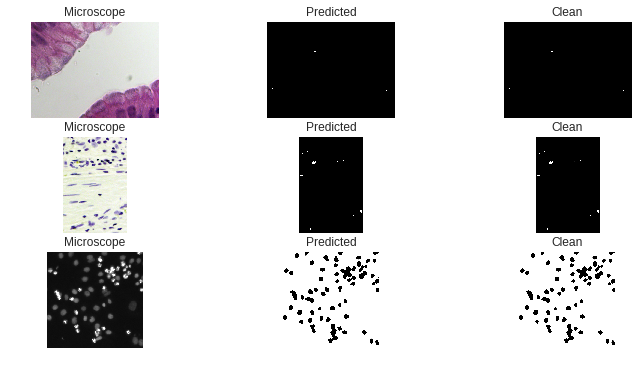

In [37]:
n_img = 3
from skimage.morphology import closing, opening, disk
def clean_img(x):
    return opening(closing(x, disk(1)), disk(3))
fig, m_axs = plt.subplots(3, n_img, figsize = (12, 6))
for (_, d_row), (c_im, c_lab, c_clean) in zip(test_img_df.sample(n_img).iterrows(), 
                                     m_axs):
    c_im.imshow(d_row['images'])
    c_im.axis('off')
    c_im.set_title('Microscope')
    
    c_lab.imshow(d_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('Predicted')
    
    c_clean.imshow(clean_img(d_row['masks']))
    c_clean.axis('off')
    c_clean.set_title('Clean')

In [0]:
from skimage.morphology import label # label regions
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cut_off = 0.5):
    lab_img = label(x>cut_off)
    if lab_img.max()<1:
        lab_img[0,0] = 1 # ensure at least one prediction per image
    for i in range(1, lab_img.max()+1):
        yield rle_encoding(lab_img==i)

In [0]:
_, train_rle_row = next(train_img_df.tail(5).iterrows()) 
train_row_rles = list(prob_to_rles(train_rle_row['masks']))

In [0]:
tl_rles = train_labels.query('ImageId=="{ImageId}"'.format(**train_rle_row))['EncodedPixels']

In [41]:
match, mismatch = 0, 0
for img_rle, train_rle in zip(sorted(train_row_rles, key = lambda x: x[0]), 
                             sorted(tl_rles, key = lambda x: x[0])):
    for i_x, i_y in zip(img_rle, train_rle):
        if i_x == i_y:
            match += 1
        else:
            mismatch += 1
print('Matches: %d, Mismatches: %d, Accuracy: %2.1f%%' % (match, mismatch, 100.0*match/(match+mismatch)))

Matches: 624, Mismatches: 0, Accuracy: 100.0%


In [0]:
test_img_df['rles'] = test_img_df['masks'].map(clean_img).map(lambda x: list(prob_to_rles(x)))


In [43]:
out_pred_list = []
for _, c_row in test_img_df.iterrows():
    for c_rle in c_row['rles']:
        out_pred_list+=[dict(ImageId=c_row['ImageId'], 
                             EncodedPixels = ' '.join(np.array(c_rle).astype(str)))]
out_pred_df = pd.DataFrame(out_pred_list)
print(out_pred_df.shape[0], 'regions found for', test_img_df.shape[0], 'images')
out_pred_df.sample(3)

1386 regions found for 65 images


,EncodedPixels,ImageId
923,60757 2 61011 6 61267 6 61522 8 61778 8 62034 ...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
632,85785 1 86303 5 86822 7 87340 10 87860 11 8837...,550450e4bff4036fd671decdc5d42fec23578198d6a2fd...
168,95124 6 95641 10 96159 11 96678 12 97196 12 97...,336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a96...


In [0]:
out_pred_df[['ImageId', 'EncodedPixels']].to_csv('predictions.csv', index = False)